# Fake News Detection
**Name:** Marion Osong

**Group:** Group 2B

## Introduction
With the rise of social media and online platforms, the spread of fake news has become a major concerns.False information can mislead the public, influence opinions, and cause real-world harm. Manual fact-checking is no longer sufficient given the volume of content shared daily.

## Problem statement
In an era of rampant misinformation, particulary on social media and online platforms,it is increasingly difficult to distinguish between leditimate news and fabricated content.This project aims to build a machine learning-based system that can automatically classify news articles as real or fake using natural language processing techniques, thereby supporting fact-checking efforts and reducing the spread of disinformation.

In [3]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#NLP tools and NLTK linrary modules
import nltk 
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, TweetTokenizer
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk import pos_tag
from nltk.corpus import stopwords, wordnet
from collections import Counter
from wordcloud import WordCloud
import re
import string
# scikit-learn library's classes, tools and modules
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,f1_score, precision_score, roc_curve, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
import joblib
# tenserflow and keras modules
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model

import warnings
warnings.filterwarnings('ignore')


## Data loading

In [4]:
# Load the dataset
df = pd.read_csv(r'C:\Users\ADMIN\Documents\Fake-News-Detection-\dataset\data (1).csv')

### Understanding the dataset.

In [5]:
# Load the first few rows of the dataset
df.head(10)

,news_url,title,extracted_article_text,news_type,class
0,https://www.bustle.com/p/will-the-royals-retur...,Will 'The Royals' Return For Season 5? This St...,Entertainment With a royal wedding and a coup ...,gossip,1
1,https://www.foxnews.com/entertainment/naya-riv...,Naya Rivera refiles for divorce from Ryan Dors...,"This material may not be published, broadcast,...",gossip,1
2,https://www.unitedbypop.com/style/fashion/tayl...,Outfit ideas for Taylor Swift's Reputation Tour,United By Pop - United Kingdom. United States....,gossip,1
3,https://variety.com/2018/music/news/scott-hutc...,Scott Hutchison Dead: Frightened Rabbit Frontm...,By Robert Mitchell A body found Thursday night...,gossip,1
4,https://www.etonline.com/kate-middleton-gives-...,Kate Middleton Gives Birth to Royal Baby No. 3...,Baby No. 3 is officially here! Kate Middleton ...,gossip,1
5,people.com/parents/khloe-kardashian-daughter-t...,Khloe Kardashian: True Has 'Baby Class Once a ...,"""It's so fun to see how they all interact and ...",gossip,0
6,https://people.com/pets/lena-dunham-cat-gia-ma...,Lena Dunham Mourns the Death of Her Cat Gia Ma...,Lena Dunham's beloved cat Gia Marie died in he...,gossip,1
7,https://www.bbc.com/news/entertainment-arts-43...,Tim McGraw collapses on stage in Ireland,Country star Tim McGraw collapsed on stage dur...,gossip,1
8,https://www.nbclosangeles.com/news/local/Star-...,Star Wars Fans Show Up for 'Solo' Red Carpet i...,Hollywood Boulevard was shutdown at Highland T...,gossip,1
9,https://www.dailymail.co.uk/tvshowbiz/article-...,Jessica Simpson insists she's not pregnant on ...,By DAILYMAIL.COM REPORTER Published: 14:49 BST...,gossip,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16044 entries, 0 to 16043
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   news_url                16044 non-null  object
 1   title                   16044 non-null  object
 2   extracted_article_text  16044 non-null  object
 3   news_type               16044 non-null  object
 4   class                   16044 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 626.8+ KB


In [7]:
df.shape

(16044, 5)

In [8]:
df.columns

Index(['news_url', 'title', 'extracted_article_text', 'news_type', 'class'], dtype='object')

In [9]:
df['news_type'].value_counts()

gossip       15504
political      540
Name: news_type, dtype: int64

In [10]:
df.describe()

,class
count,16044.000000
mean,0.771316
std,0.419998
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


### Data Cleaning and preparation

In [11]:
# check for duplicates 
df.duplicated().sum()

928

In [12]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [13]:
# Confirm that duplicates have been removed
df.duplicated().sum()

0

In [14]:
# Check for missing values
df.isnull().sum()

news_url                  0
title                     0
extracted_article_text    0
news_type                 0
class                     0
dtype: int64

In [15]:
df.shape

(15116, 5)

From the above analysis we conclude that the dataset;
- Has 5 columns and 16,044rows.
- Has the following column attributes:
    - title
    - extracted_article_text
    - news_type
    - class
    - news_url 
- Has a total number of 928 duplicates.
- The dataset does not have null values.

### Visualizations

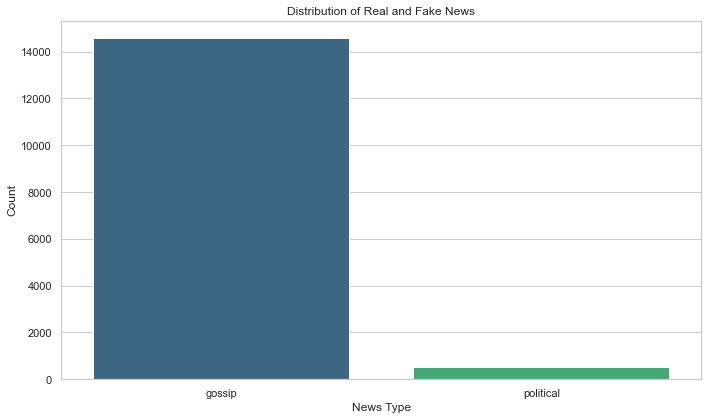

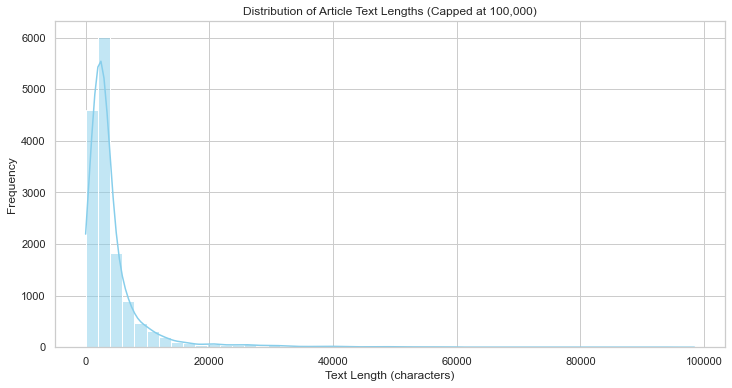

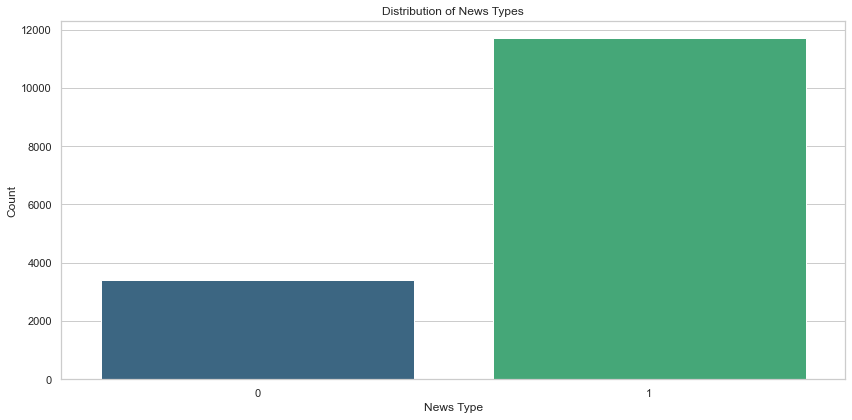

In [16]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='news_type', data=df, palette='viridis')
plt.title('Distribution of Real and Fake News')
plt.xlabel('News Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# calculate the length of each article
df['text_length'] = df['extracted_article_text'].apply(len)
# Filter to remove extreme outliers for plotting
filtered_df = df[df['text_length'] < 100000]
# Plot the distribution

plt.figure(figsize=(12, 6))
sns.histplot(data=df[df['text_length'] < 100000], x='text_length', bins=50, kde=True, color='skyblue')
plt.title('Distribution of Article Text Lengths (Capped at 100,000)')
plt.xlabel('Text Length (characters)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='class', data=df, palette='viridis')
plt.title('Distribution of News Types')
plt.xlabel('News Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()




- The fake news bar is much taller than the real news bar; showing an imbalance.
- Most news in the dataset are gossip-related and a small portion is political.


### preprocessing
This step transforms raw text into a format suitable for analysis and machine learning. This process will involve cleaning, standardizing and structuring text data.



In [17]:
#concatenate the two strings and store results in the new column 'article'
df['article'] = df['title'] + df['extracted_article_text']

#confirm the new column is created
df.head()

,news_url,title,extracted_article_text,news_type,class,text_length,article
0,https://www.bustle.com/p/will-the-royals-retur...,Will 'The Royals' Return For Season 5? This St...,Entertainment With a royal wedding and a coup ...,gossip,1,3817,Will 'The Royals' Return For Season 5? This St...
1,https://www.foxnews.com/entertainment/naya-riv...,Naya Rivera refiles for divorce from Ryan Dors...,"This material may not be published, broadcast,...",gossip,1,2303,Naya Rivera refiles for divorce from Ryan Dors...
2,https://www.unitedbypop.com/style/fashion/tayl...,Outfit ideas for Taylor Swift's Reputation Tour,United By Pop - United Kingdom. United States....,gossip,1,7489,Outfit ideas for Taylor Swift's Reputation Tou...
3,https://variety.com/2018/music/news/scott-hutc...,Scott Hutchison Dead: Frightened Rabbit Frontm...,By Robert Mitchell A body found Thursday night...,gossip,1,5549,Scott Hutchison Dead: Frightened Rabbit Frontm...
4,https://www.etonline.com/kate-middleton-gives-...,Kate Middleton Gives Birth to Royal Baby No. 3...,Baby No. 3 is officially here! Kate Middleton ...,gossip,1,1877,Kate Middleton Gives Birth to Royal Baby No. 3...


In [18]:
nltk.download('punkt') # Splits text to individual words and sentences.
nltk.download('averaged_perceptron_tagger') # Tags words with grammatical role ie nouns.
nltk.download('wordnet') # Required for lemmatization
nltk.download('stopwords')# Removesininformative words from the text.

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
def clean_text(text):
    text = text.lower()  # lowercase all characters
    text = re.sub(r'http?://\S+|www\.\S+', '', text)  # drop URLs
    text = re.sub(r'\[.*?\]', '', text)  # Remove content enclosed by []
    text = re.sub(r'<.*?>+', '', text)  # Remove content enclosed with angle brackets
    text = re.sub(r'\n', ' ', text)  # Replace newlines with space.

    # Tokenize the text
    tokens = word_tokenize(text) 

    # POS tagging
    tagged_tokens = pos_tag(tokens)

    lemmatizer = WordNetLemmatizer()

    # Define a function to map NLTK's POS tags to WordNet's tags for lemmatization
    def get_wordnet_pos(treebank_tag):
        if treebank_tag.startswith('J'): 
            return wordnet.ADJ
        elif treebank_tag.startswith('V'):
            return wordnet.VERB
        elif treebank_tag.startswith('N'):
            return wordnet.NOUN
        elif treebank_tag.startswith('R'):
            return wordnet.ADV
        else:
            return wordnet.NOUN  

    lemmatized_words = []
    for word, tag in tagged_tokens: 
         wntag = get_wordnet_pos(tag)
         lemmatized_words.append(lemmatizer.lemmatize(word, wntag))

    stop_words = set(stopwords.words('english'))  # Remove stopwords
    filtered_tokens_stopwords = [word for word in lemmatized_words if word not in stop_words]

    cleaned_tokens = [re.sub(r'[^a-zA-Z]', '', word) for word in filtered_tokens_stopwords]  # Removes punctuation
    cleaned_tokens = [word for word in cleaned_tokens if word]  # Removes empty strings
    word_tokens = [word for word in cleaned_tokens if not word.isdigit()]  # Removes digits
    final_tokens = [word for word in word_tokens if len(word) > 2]  # Removes single-character and two-character words

    return final_tokens 

# Apply to DataFrame
df['article'] = df['article'].apply(clean_text)

In [20]:
# confirm the changes.
df.head(10)

,news_url,title,extracted_article_text,news_type,class,text_length,article
0,https://www.bustle.com/p/will-the-royals-retur...,Will 'The Royals' Return For Season 5? This St...,Entertainment With a royal wedding and a coup ...,gossip,1,3817,"[the, royal, return, season, story, far, overe..."
1,https://www.foxnews.com/entertainment/naya-riv...,Naya Rivera refiles for divorce from Ryan Dors...,"This material may not be published, broadcast,...",gossip,1,2303,"[naya, rivera, refiles, divorce, ryan, dorsey,..."
2,https://www.unitedbypop.com/style/fashion/tayl...,Outfit ideas for Taylor Swift's Reputation Tour,United By Pop - United Kingdom. United States....,gossip,1,7489,"[outfit, idea, taylor, swift, reputation, tour..."
3,https://variety.com/2018/music/news/scott-hutc...,Scott Hutchison Dead: Frightened Rabbit Frontm...,By Robert Mitchell A body found Thursday night...,gossip,1,5549,"[scott, hutchison, dead, frightened, rabbit, f..."
4,https://www.etonline.com/kate-middleton-gives-...,Kate Middleton Gives Birth to Royal Baby No. 3...,Baby No. 3 is officially here! Kate Middleton ...,gossip,1,1877,"[kate, middleton, give, birth, royal, baby, bo..."
5,people.com/parents/khloe-kardashian-daughter-t...,Khloe Kardashian: True Has 'Baby Class Once a ...,"""It's so fun to see how they all interact and ...",gossip,0,2013,"[khloe, kardashian, true, baby, class, week, c..."
6,https://people.com/pets/lena-dunham-cat-gia-ma...,Lena Dunham Mourns the Death of Her Cat Gia Ma...,Lena Dunham's beloved cat Gia Marie died in he...,gossip,1,2824,"[lena, dunham, mourn, death, cat, gia, marie, ..."
7,https://www.bbc.com/news/entertainment-arts-43...,Tim McGraw collapses on stage in Ireland,Country star Tim McGraw collapsed on stage dur...,gossip,1,2598,"[tim, mcgraw, collapse, stage, irelandcountry,..."
8,https://www.nbclosangeles.com/news/local/Star-...,Star Wars Fans Show Up for 'Solo' Red Carpet i...,Hollywood Boulevard was shutdown at Highland T...,gossip,1,1157,"[star, war, fan, show, solo, red, carpet, holl..."
9,https://www.dailymail.co.uk/tvshowbiz/article-...,Jessica Simpson insists she's not pregnant on ...,By DAILYMAIL.COM REPORTER Published: 14:49 BST...,gossip,1,2069,"[jessica, simpson, insist, pregnant, ellenby, ..."


### Extraploratory Data Analysis

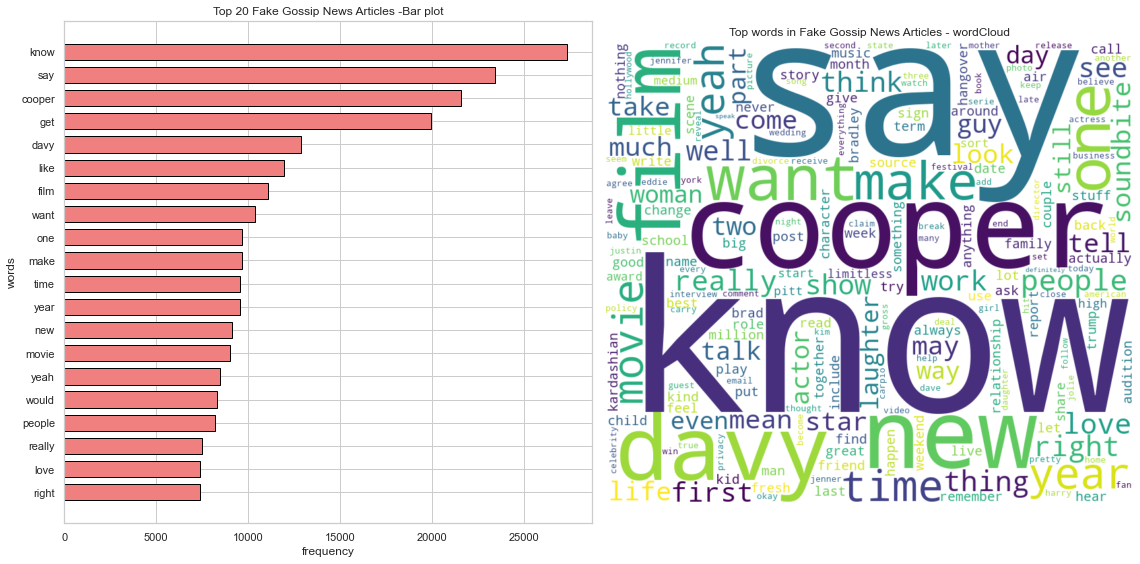

In [42]:
# Filter the fake gossip news
fake_gossip_news_df = df [(df['class']==0) & (df['news_type']=='gossip')]
all_fake_gossip_words = [word for sublist in fake_gossip_news_df['article']for word in sublist]
# count the frequency of each word
words_counts = Counter(all_fake_gossip_words)
# Get the top 20 most common words
top_20_words = words_counts.most_common(20)
# Horizontal bar plot
words_for_plot = [item[0] for item in top_20_words]
counts_for_plot = [item[1] for item in top_20_words]
#Reverse the list to plot highest count at the top horizontal bar plot
words_for_plot.reverse()
counts_for_plot.reverse()
#create a string from the list of all fake political news for the worldcloud
text_for_wordcloud = " ".join(all_fake_gossip_words)
# Generates word cloud
wordcloud = WordCloud(
    width=800,
    height=700,
    background_color='white',
    collocations=False
).generate(text_for_wordcloud)
# Plot the bar plot
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.barh(words_for_plot, counts_for_plot, color = 'lightcoral', height = 0.7, edgecolor = 'black')
plt.xlabel('frequency')
plt.ylabel('words')
plt.title('Top 20 Fake Gossip News Articles -Bar plot')

plt.subplot (1, 2, 2)
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis('off')
plt.title('Top words in Fake Gossip News Articles - wordCloud')
plt.tight_layout()
plt.show()
    

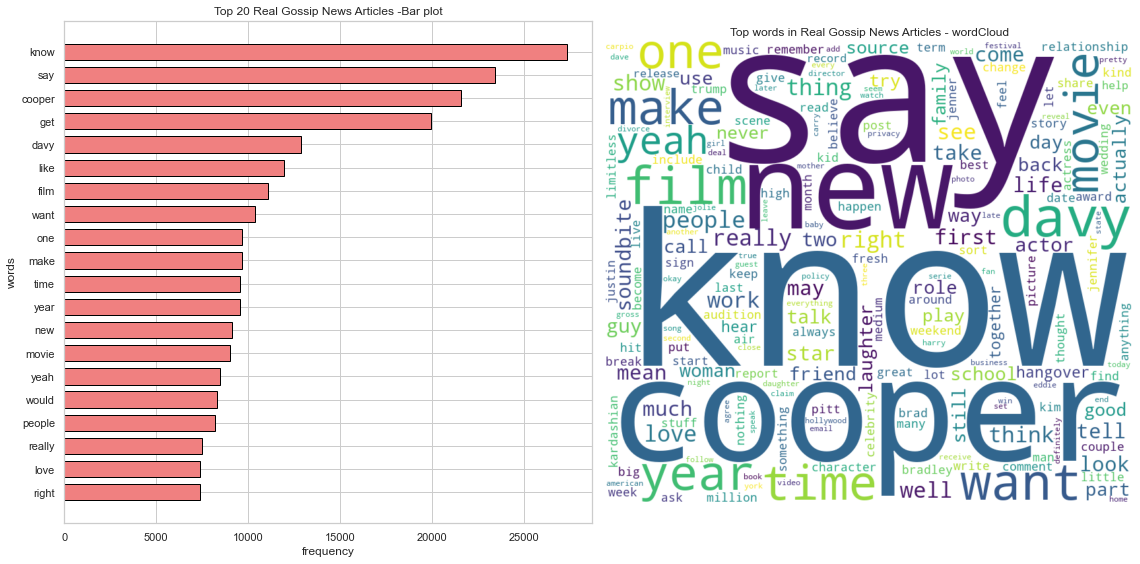

In [43]:
# Filter the real gossip news
real_gossip_news_df = df [(df['class']==0) & (df['news_type']=='gossip')]
all_real_gossip_words = [word for sublist in real_gossip_news_df['article']for word in sublist]
# count the frequency of each word
words_counts = Counter(all_real_gossip_words)
# Get the top 20 most common words
top_20_words = words_counts.most_common(20)
# Horizontal bar plot
words_for_plot = [item[0] for item in top_20_words]
counts_for_plot = [item[1] for item in top_20_words]
#Reverse the list to plot highest count at the top horizontal bar plot
words_for_plot.reverse()
counts_for_plot.reverse()
#create a string from the list of all real political news for the worldcloud
text_for_wordcloud = " ".join(all_real_gossip_words)
# Generates word cloud
wordcloud = WordCloud(
    width=800,
    height=700,
    background_color='white',
    collocations=False
).generate(text_for_wordcloud)
# Plot the bar plot
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.barh(words_for_plot, counts_for_plot, color = 'lightcoral', height = 0.7, edgecolor = 'black')
plt.xlabel('frequency')
plt.ylabel('words')
plt.title('Top 20 Real Gossip News Articles -Bar plot')

plt.subplot (1, 2, 2)
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis('off')
plt.title('Top words in Real Gossip News Articles - wordCloud')
plt.tight_layout()
plt.show()

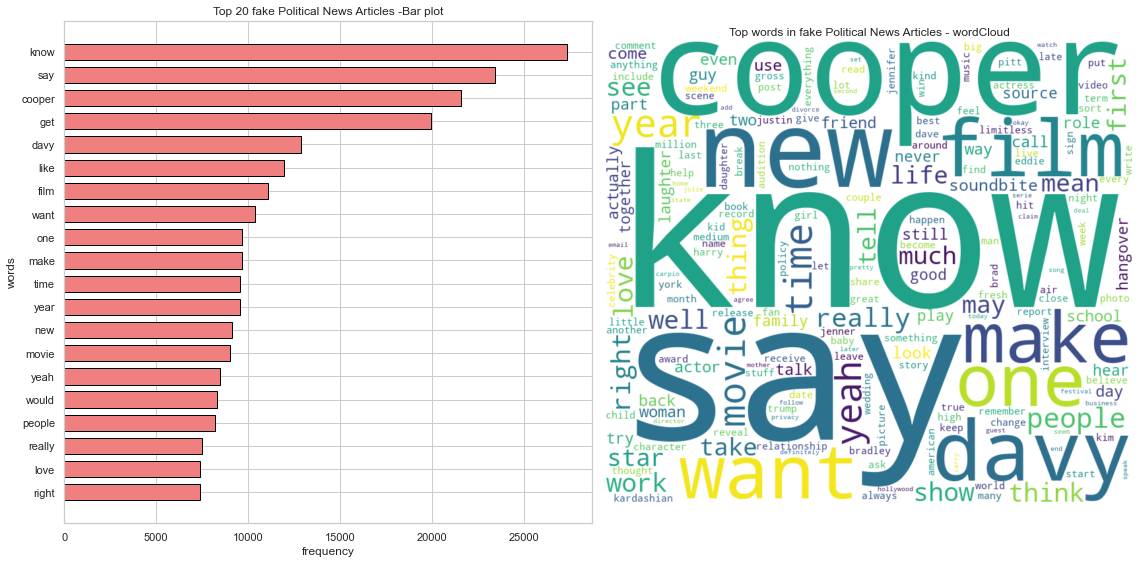

In [39]:
# Filter all the fake political news
fake_political_news_df = df [(df['class']==0) & (df['news_type']=='gossip')]
all_fake_political_words = [word for sublist in fake_political_news_df['article']for word in sublist]
# count the frequency of each word
words_counts = Counter(all_fake_political_words)
# Get the top 20 most common words
top_20_words = words_counts.most_common(20)
# Horizontal bar plot
words_for_plot = [item[0] for item in top_20_words]
counts_for_plot = [item[1] for item in top_20_words]
#Reverse the list to plot highest count at the top horizontal bar plot
words_for_plot.reverse()
counts_for_plot.reverse()
#create a string from the list of all real political news for the worldcloud
text_for_wordcloud = " ".join(all_fake_political_words)
# Generates word cloud
wordcloud = WordCloud(
    width=800,
    height=700,
    background_color='white',
    collocations=False
).generate(text_for_wordcloud)
# Plot the bar plot
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.barh(words_for_plot, counts_for_plot, color = 'lightcoral', height = 0.7, edgecolor = 'black')
plt.xlabel('frequency')
plt.ylabel('words')
plt.title('Top 20 fake Political News Articles -Bar plot')

plt.subplot (1, 2, 2)
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis('off')
plt.title('Top words in fake Political News Articles - wordCloud')
plt.tight_layout()
plt.show()

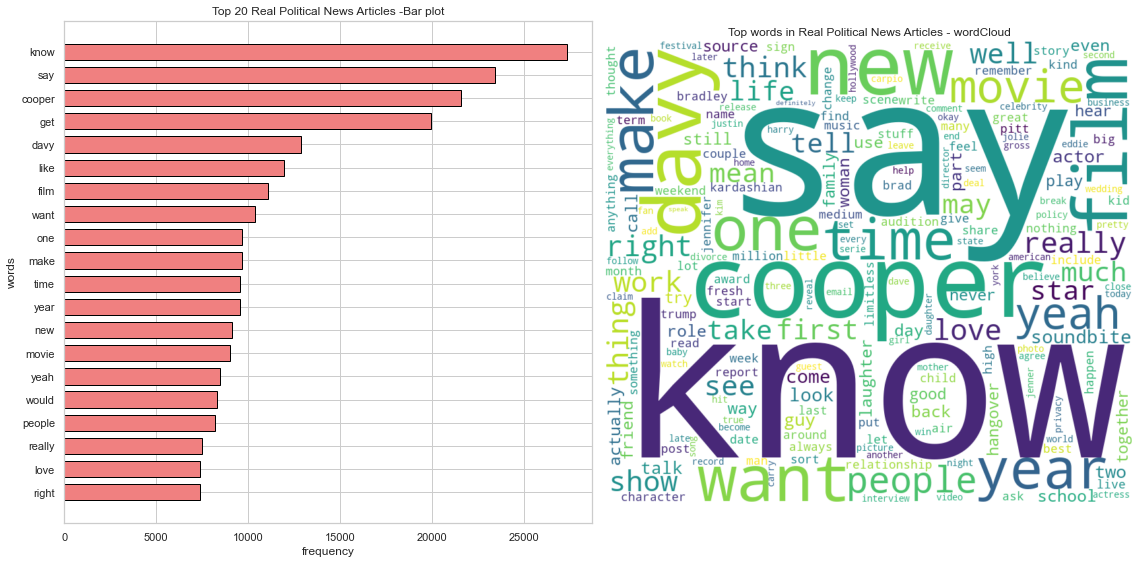

In [41]:
# Filter all the real political news
real_political_news_df = df [(df['class']==0) & (df['news_type']=='gossip')]
all_real_political_words = [word for sublist in real_political_news_df['article']for word in sublist]
# count the frequency of each word
words_counts = Counter(all_real_political_words)
# Get the top 20 most common words
top_20_words = words_counts.most_common(20)
# Horizontal bar plot
words_for_plot = [item[0] for item in top_20_words]
counts_for_plot = [item[1] for item in top_20_words]
#Reverse the list to plot highest count at the top horizontal bar plot
words_for_plot.reverse()
counts_for_plot.reverse()
#create a string from the list of all real political news for the worldcloud
text_for_wordcloud = " ".join(all_real_political_words)
# Generates word cloud
wordcloud = WordCloud(
    width=800,
    height=700,
    background_color='white',
    collocations=False
).generate(text_for_wordcloud)
# Plot the bar plot
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.barh(words_for_plot, counts_for_plot, color = 'lightcoral', height = 0.7, edgecolor = 'black')
plt.xlabel('frequency')
plt.ylabel('words')
plt.title('Top 20 Real Political News Articles -Bar plot')

plt.subplot (1, 2, 2)
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis('off')
plt.title('Top words in Real Political News Articles - wordCloud')
plt.tight_layout()
plt.show()

### Modelling
Logistic Regression: To predict The News Type of an article

In [50]:
from sklearn.model_selection import train_test_split
df = df.copy()

df['joined_text'] = df['article'].apply(lambda x: " ".join(x))

X = df['joined_text']
y = df['news_type'] 

'''First split: Training_full_product (80% of X) and Test_product (20% of X)'''
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

'''Second split: Training (80% of X_train_full_logistic) and Validation (20% of X_train_full_logistic)'''
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full)

print(f"Training set size: {len(X_train_logistic)}")
print(f"Validation set size: {len(X_val_logistic)}")
print(f"Test set size: {len(X_test_logistic)}")

Training set size: 9673
Validation set size: 2419
Test set size: 3024


TF-IDF Vectorizer Results:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2335
           1       0.96      0.30      0.45        84

    accuracy                           0.98      2419
   macro avg       0.97      0.65      0.72      2419
weighted avg       0.97      0.98      0.97      2419


Count Vectorizer Results:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2335
           1       0.92      0.73      0.81        84

    accuracy                           0.99      2419
   macro avg       0.96      0.86      0.90      2419
weighted avg       0.99      0.99      0.99      2419



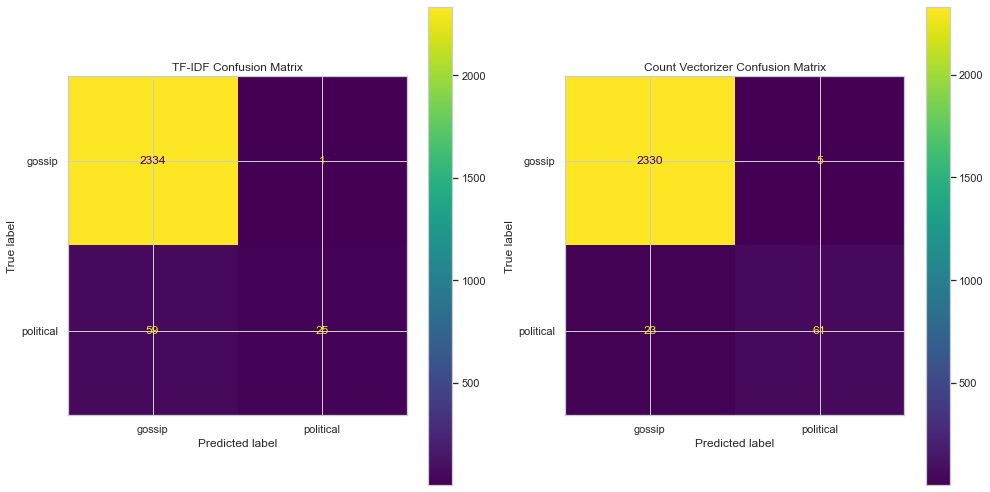

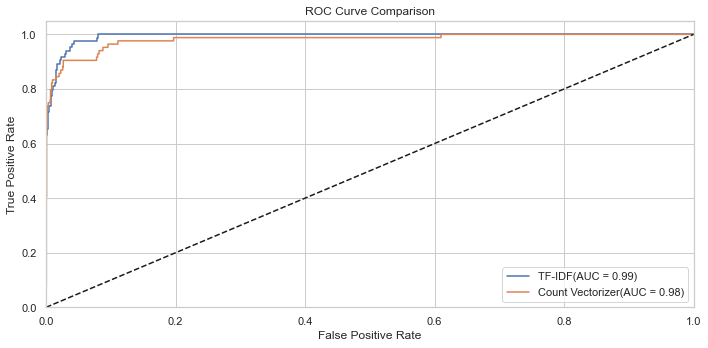

In [58]:
# encoding target variables
from sklearn import pipeline
from sklearn.metrics import auc

le = LabelEncoder()
y_train_logistic_encoded = le.fit_transform(y_train)
y_val_logistic_encoded = le.transform(y_val)
y_test_logistic_encoded = le.transform(y_test)
classes_ = le.classes_

# Define pipelines
pipeline_tfidf = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("clf", LogisticRegression(max_iter = 200))
])

pipeline_count = Pipeline([
    ("tfidf", CountVectorizer()),
    ("clf", LogisticRegression(max_iter = 200))
])

# Fitting the pipelines
pipeline_tfidf.fit(X_train, y_train_logistic_encoded)
pipeline_count.fit(X_train, y_train_logistic_encoded)

# getting predections
y_pred_tfidf = pipeline_tfidf.predict(X_val)
y_pred_count = pipeline_count.predict(X_val)
y_prob_tfidf = pipeline_tfidf.predict_proba(X_val)[:, 1]
y_prob_count = pipeline_count.predict_proba(X_val)[:, 1]

# Print classification reports
print("TF-IDF Vectorizer Results:")
print(classification_report(y_val_logistic_encoded, y_pred_tfidf))
print("\nCount Vectorizer Results:")
print(classification_report(y_val_logistic_encoded, y_pred_count))

#Calculate ROC curves
fpr_tfidf, tpr_tfidf, _ = roc_curve(y_val_logistic_encoded, y_prob_tfidf)
fpr_count, tpr_count, _ = roc_curve(y_val_logistic_encoded, y_prob_count)

#calculate AUC 
roc_auc_tfidf = auc(fpr_tfidf, tpr_tfidf)
roc_auc_count = auc(fpr_count, tpr_count)

#Plot the confusion matrices
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14, 7))

#TF-IDF Confusion matrix
cm_tfidf = confusion_matrix(y_val_logistic_encoded, y_pred_tfidf)
disp_tfidf = ConfusionMatrixDisplay(confusion_matrix=cm_tfidf, display_labels=classes_)
disp_tfidf.plot(ax=ax1)
ax1.set_title('TF-IDF Confusion Matrix')

# Count Vectorizer confusion matrix
cm_count = confusion_matrix(y_val_logistic_encoded, y_pred_count)
disp_count = ConfusionMatrixDisplay(confusion_matrix=cm_count, display_labels=classes_)
disp_count.plot(ax=ax2)
ax2.set_title('Count Vectorizer Confusion Matrix')

plt.tight_layout()
plt.show()

# Plot ROC curves
plt.figure (figsize=(10, 5))
plt.plot(fpr_tfidf, tpr_tfidf, label = f'TF-IDF(AUC = {roc_auc_tfidf:.2f})')
plt.plot(fpr_count, tpr_count, label=f'Count Vectorizer(AUC = {roc_auc_count:.2f})')
plt.plot([0,1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.grid(True)

plt.tight_layout()
plt.show()